In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Library.Random import*
from tqdm import trange

# Q.1

# <h3> Generate random numbers in range [0,1] using multiplicative linear congruential generator defined by $x_n = a x_n\%m$ using 
# <h3>  (i) a = 65, m = 1021 and (ii) a = 572, m = 16381.

In [2]:
#find the random number using LCG
a1, m1, a2, m2 = 65, 1021, 572, 16381
x1 = lcg(seed = 10,a = a1, c = 0, n = 10, m = m1)
x2 = lcg(seed = 10, a = a2, c = 0, n = 10, m = m2)
print(f"The random number generated using LCG with a = {a1}, m = {m1} is", np.array(x1))
print()
print(f"The random number generated using LCG with a = {a2}, m = {m2} is", np.array(x2))

The random number generated using LCG with a = 65, m = 1021 is [0.63663075 0.38099902 0.76493634 0.7208619  0.85602351 0.64152791
 0.6993144  0.45543585 0.60333007 0.21645446]

The random number generated using LCG with a = 572, m = 16381 is [0.34918503 0.73383798 0.75532629 0.0466394  0.6777364  0.6652219
 0.50692876 0.96325011 0.97906111 0.02295342]


For a1, m1 

100%|██████████| 9990/9990 [00:09<00:00, 1079.90it/s]


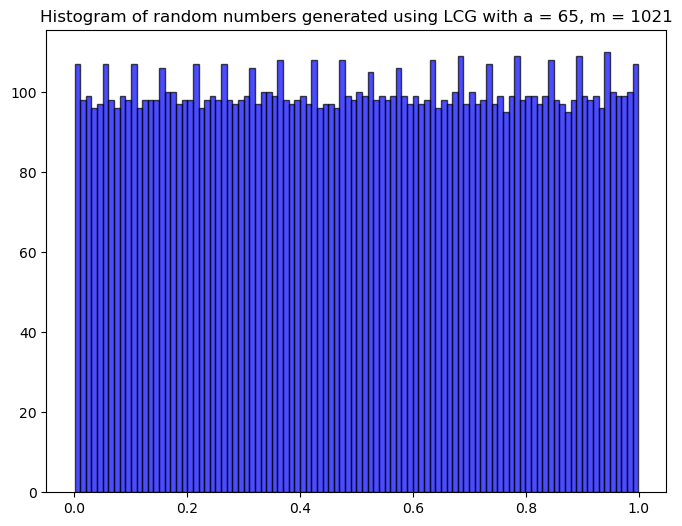

In [3]:
xlist = []
ylist = []
plt.figure(figsize=(8,6))
for i in trange(10, 10000):
    xlist.append(i)
    ylist.append(lcg(seed = 10, a = a1, c = 0, n = i, m = m1)[-1])
plt.hist(ylist, bins = 100, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title(f"Histogram of random numbers generated using LCG with a = {a1}, m = {m1}")
plt.show()

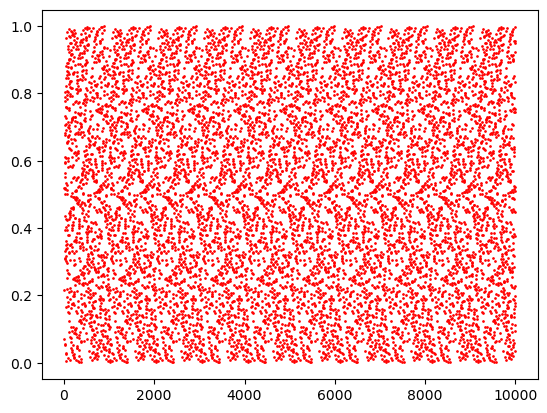

In [4]:
plt.scatter(xlist, ylist, color = 'red', s = 0.9)

For a2, m2

 97%|█████████▋| 9643/9990 [00:06<00:00, 735.04it/s]  

100%|██████████| 9990/9990 [00:07<00:00, 1364.76it/s]


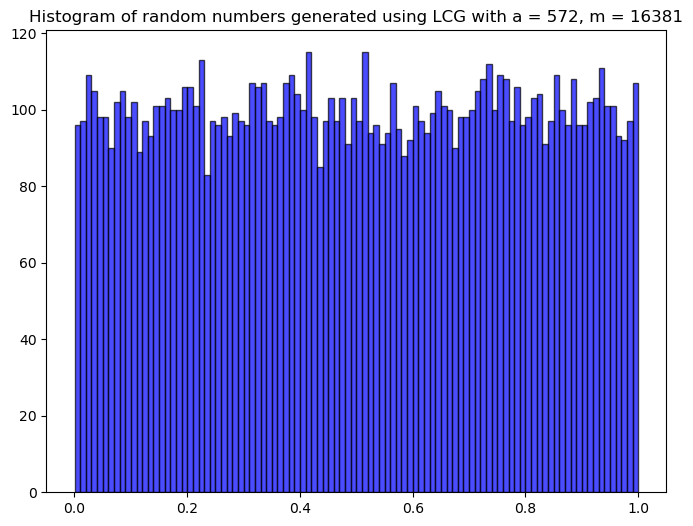

In [5]:
xlist = []
ylist = []
plt.figure(figsize=(8,6))
for i in trange(10, 10000):
    xlist.append(i)
    ylist.append(lcg(seed = 10, a = a2, c = 0, n = i, m = m2)[-1])
plt.hist(ylist, bins = 100, color = 'blue', edgecolor = 'black', alpha = 0.7)
plt.title(f"Histogram of random numbers generated using LCG with a = {a2}, m = {m2}")
plt.show()

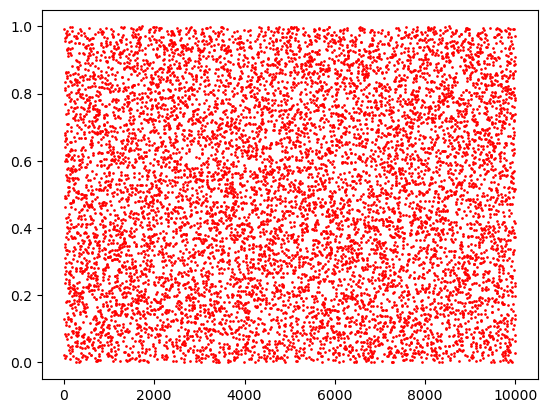

In [6]:
plt.scatter(xlist, ylist, color = 'red', s = 0.9)

# Q.2

In [7]:
#define a function 
def f_i(x):
    return np.cos(x)

In [8]:
n = 100000
#first LCG case
k1 = monte_carlo_integration(f_i, a = -np.pi/2, b = np.pi/2, n = n, seed = 10, a_lcg = a1, c_lcg = 0, m_lcg = m1)
print(f"The value of the integral wih n = {n} is", k1)

The value of the integral wih n = 100000 is 2.002075190778928


100%|██████████| 99/99 [00:06<00:00, 14.48it/s] 


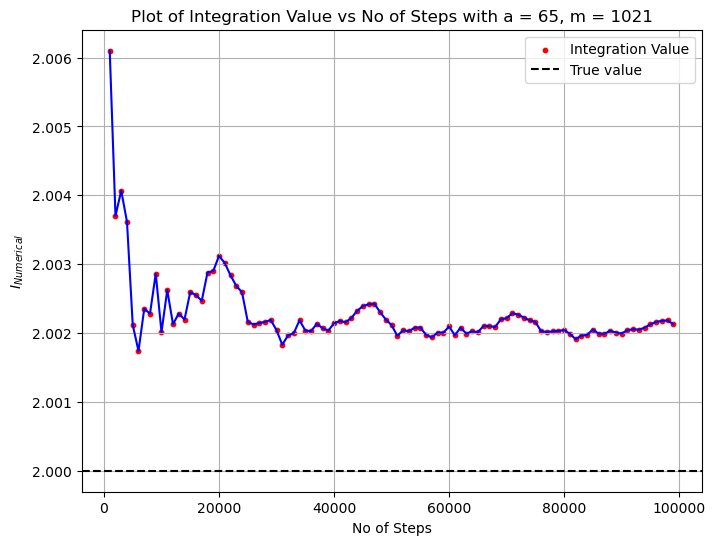

In [9]:
#check the convergence of the integral
xlist = []
ylist = []
plt.figure(figsize=(8,6))
for i in trange(1000,100000,1000):
    xlist.append(i)
    ylist.append(monte_carlo_integration(f_i, a = -np.pi/2, b = np.pi/2, n = i, seed = 10, a_lcg = a1, c_lcg = 0, m_lcg = m1))

plt.plot(xlist,ylist,color='blue')
plt.scatter(xlist,ylist,color='red',s=10,label='Integration Value')
plt.xlabel('No of Steps')
plt.ylabel('$I_{Numerical}$')
plt.title(f'Plot of Integration Value vs No of Steps with a = {a1}, m = {m1}')
plt.axhline(y=2, color="k", linestyle="--", label="True value")
plt.grid()
plt.legend()
plt.show()

In [10]:
#second LCG case
k2 = monte_carlo_integration(f_i, a = -np.pi/2, b = np.pi/2, n = n, seed = 10, a_lcg = a2, c_lcg = 0, m_lcg = m2)
print(f"The value of the integral wih n = {n} is", k2)

The value of the integral wih n = 100000 is 1.999871389772022


 90%|████████▉ | 89/99 [00:05<00:01,  8.28it/s]

100%|██████████| 99/99 [00:07<00:00, 13.98it/s]


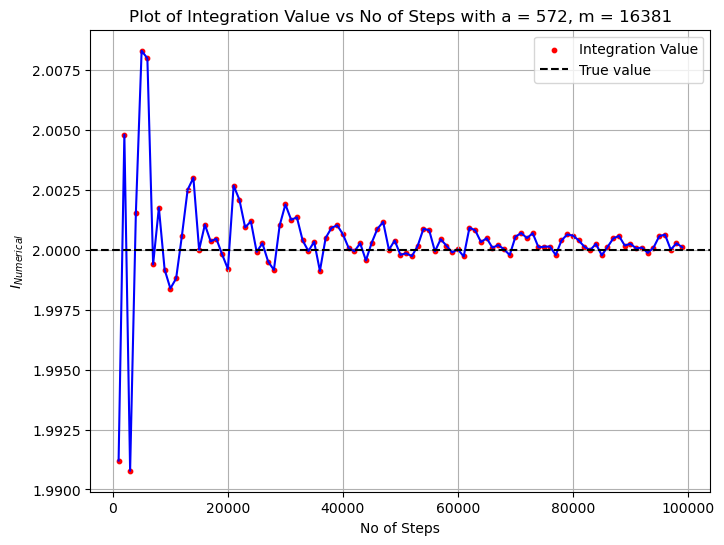

In [11]:
#check the convergence of the integral
xlist = []
ylist = []
plt.figure(figsize=(8,6))
for i in trange(1000,100000,1000):
    xlist.append(i)
    ylist.append(monte_carlo_integration(f_i, a = -np.pi/2, b = np.pi/2, n = i, seed = 10, a_lcg = a2, c_lcg = 0, m_lcg = m2))

plt.plot(xlist,ylist,color='blue')
plt.scatter(xlist,ylist,color='red',s=10,label='Integration Value')
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Numerical}$')
plt.title(f'Plot of Integration Value vs No of Steps with a = {a2}, m = {m2}')
plt.axhline(y=2, color="k", linestyle="--", label="True value")
plt.grid()
plt.legend()
plt.show()

# <h4> Do the integration by choosing a, m used in Numerical Recipes

In [12]:
#check the convergence of the integral with the a, m values used in Numerical Recipes
xlist = []
ylist = []
plt.figure(figsize=(8,6))
for i in trange(1000,100000,1000):
    xlist.append(i)
    ylist.append(monte_carlo_integration(f_i, a = -np.pi/2, b = np.pi/2, n = i, seed = 10, a_lcg = 1664525, c_lcg = 0, m_lcg= 2**31 - 1))

plt.plot(xlist,ylist,color='blue')
plt.scatter(xlist,ylist,color='red',s=10,label='Integration Value')
plt.xlabel('No of Steps')
plt.ylabel('$I_{Numerical}$')
plt.title('Plot of Integration Value vs No of Steps with a = 1664525, m = $2^{31}-1$')
plt.axhline(y=2, color="k", linestyle="--", label="True value")
plt.grid()
plt.legend()
plt.show()

  0%|          | 0/99 [00:00<?, ?it/s]

 95%|█████████▍| 94/99 [00:08<00:00,  6.72it/s]

# <h4> So, for some random number it converges faster. But eventually, for all random number the integral value is converging to the actual value for different n (large)    values. The comparatively good set is ($a_2$, $m_2$) for doing this integration.

# Q.3

# <h3> 1. Using Inverse Transformation method

# <h4> The given distribution is q(y) = $e^{−2x}$. Our range is from 0 to 3. so the known uniform distribution is given by p(x) = 1/3. Using the inverse transform method we get 
 # <h4>  $|q(y) dy| = |p(x) dx| → q(y) = p(x) \frac{dx}{dy}$ $ → y = - 0.5*ln(|1-\frac{2x}{3}|)$
# <h4>  where x is the random number generated from the uniform distribution. and y is the random number converted to the exponential distribution given in the question.

In [ ]:
# Defining the distribution function
def f(x):
    return np.exp(-2*x)

# Defining the inverse of the distribution function
def f_inv(x):
    return -0.5*np.log(abs(1-(2*x/3)))

#generate ranodm number using LCG
a, m = 1664525, 2**(32)
n = 250000
x = lcg(seed = 22, a = a, c = 0, n = n, m = m)

In [ ]:
# Storing the generated random numbers
rng_values = []
for i in trange(n):
    p = 3*x[i]
    if f_inv(p) < 3:
        rng_values.append(f_inv(p))

100%|██████████| 250000/250000 [00:00<00:00, 464841.10it/s]


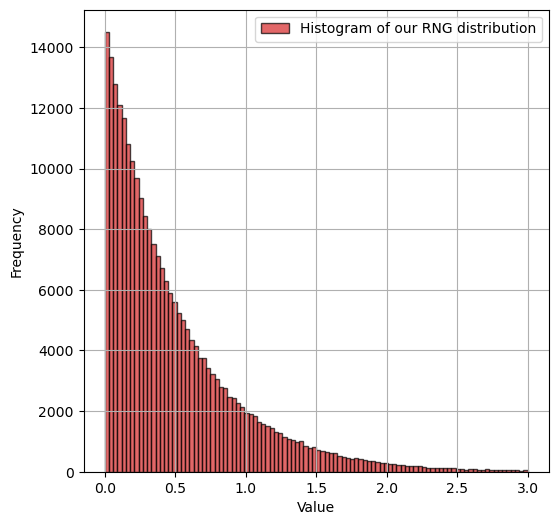

In [ ]:
# Plotting the histogram
plt.figure(figsize=(6,6))
plt.hist(rng_values, bins = 100,color="tab:red", edgecolor="k", alpha=0.7, label="Histogram of our RNG distribution")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

# <h3> 2. Using Accpet Reject method

In [ ]:
def generate_accept_reject_rng(f, g, r, ru, limits=[0, 3], a=572, m=16381):
    """Generate a random number using the accept-reject method.

    Args:
        f (callable): The distribution function.
        g (callable): The **scaled** model distribution function.
        r (Random): The random number generator. Which returns a random number from the model distribution (g).
        ru (Random): The random number generator. Which returns a random number from the uniform distribution.
        # m (int|float, optional): The scaling factor for the model distribution. Defaults to 1.
        limits (list, optional): The limits of the distribution. Defaults to [0, 3].
        a, m (int, optional): Parameters for the random number generator. Defaults to 572, 16381.

    Returns:
        float: A random number from the provided distribution function f.
    """
    rejections = 0
    while True:
        u = r.invTransform(a=a, m=m)
        p = ru.uniform(a=a, m=m)
        if p < f(u) / g(u):
            return u, rejections
        rejections += 1

100%|██████████| 100000/100000 [00:00<00:00, 115849.49it/s]


Acceptance rate is: 57.61%


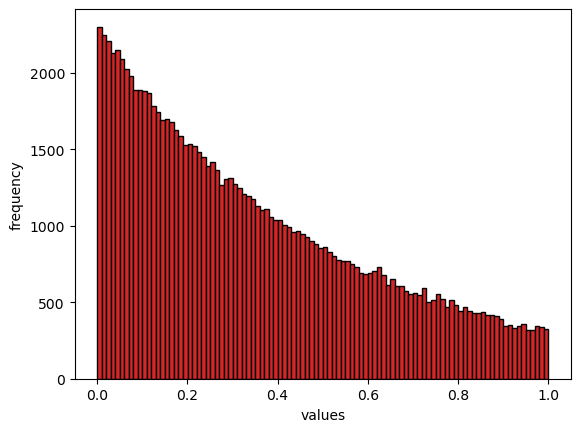

In [ ]:
N = int(1e5)
bins = 100
till = 1

m = 0.5
f = lambda x: np.exp(-2*x)
q = lambda x: m*(2-x)
q_inv = lambda x: 2 - np.sqrt(4-2*x/m)  # inverse of cum(q)
r = RandomDist(seed=22, f_inv=q_inv, range=[0, till])
ru = Random(seed=22, range=[0, 1])

distribution = []
rejections = 0

for _ in trange(N):
    u, rej = generate_accept_reject_rng(f=f, g=q, r=r, ru=ru, limits=[0, till])
    distribution.append(u)
    rejections += rej

# plot the histogram
plt.hist(distribution, bins=bins, color="tab:red", edgecolor="k", label="our RNG distribution")
plt.xlabel("values")
plt.ylabel("frequency")

print(f"Acceptance rate is: {N/(rejections+N):.2%}")

# Q.4

Use Monte Carlo to evaluate the integral (taking $N = 10,000$)

$$\int_0^2\frac{e^{-2x}}{1+x^2}dx$$

with the following importance sampling functions and comment on the variance reduction that may be achieved.

$p_1(x)=0.5\;;\;0 \le x \le 2$

$p_2(x)=e^{-x}\;;\;0 \le x$

$p_3(x)=\frac{e^{-\frac{x}{2}}}{2\left(1+e^{-\frac{1}{2}}\right)}\;;\;0 \le x \le 2$

In [ ]:
#define the given function
def fun(x):
    return np.exp(-2*x)/(1 + x**2)

In [ ]:
I = monte_carlo_integration(fun, a = 0, b = 2, n = 100000, seed = 10, a_lcg = 572, c_lcg = 0, m_lcg= 16381)
print(f"The value of the integral is", I)

The value of the integral is 0.39794178627415605


In [ ]:
# Defininf the limits of the integral
x_min = 0
x_max = 2

# Initialising the uniform RNG
N = 10000
uni_rng = lcg(seed=10, a=572, c=0, n = N, m=16381)
sum = 0
for i in range(N):
    x = uni_rng[i]
    x=-np.log(abs(1-x))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p2 = sum
print("The value of integral is ",np.round(integral_p2,6), r"using p_2(x)")

The value of integral is  0.398436 using p_2(x)


In [ ]:
for i in range(N):
    x = uni_rng[i]
    x=-2*np.log(abs((1-np.exp(-0.5))*x - 1))
    transform = ((x_max-x_min)*(x))+x_min
    sum+=(x_max - x_min)*f(transform)/N

integral_p3 = sum
print("The value of integral is ",np.round(integral_p3,6), r"using p_3(x)")

The value of integral is  1.417362 using p_3(x)


# <h3>So, we can see that the minimum variance reduction is for the first distribution as it is a uniform distribution. We are aware that in order to minimize variance, the function being integrated should closely approximate the probability density function p(x), from which samples are taken.